 # MAXIMUM LIKELIHOOD

# 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression as LinearRegressionSKL

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape

        X = np.hstack((np.ones((n_samples, 1)), X))

        self.weights = np.zeros(n_features + 1)

        # Gradient descent
        for i in range(self.max_iter):
            y_pred = X.dot(self.weights)
            error = y_pred - y
            gradient = X.T.dot(error) / n_samples
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        n_samples = X.shape[0]

        # Add bias term to X
        X = np.hstack((np.ones((n_samples, 1)), X))

        y_pred = X.dot(self.weights)
        return y_pred
    
    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "max_iter": self.max_iter}


In [3]:
data = pd.read_csv("./Salary_dataset.csv") 

In [4]:
data = data.drop(data.columns[0], axis=1)

In [5]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

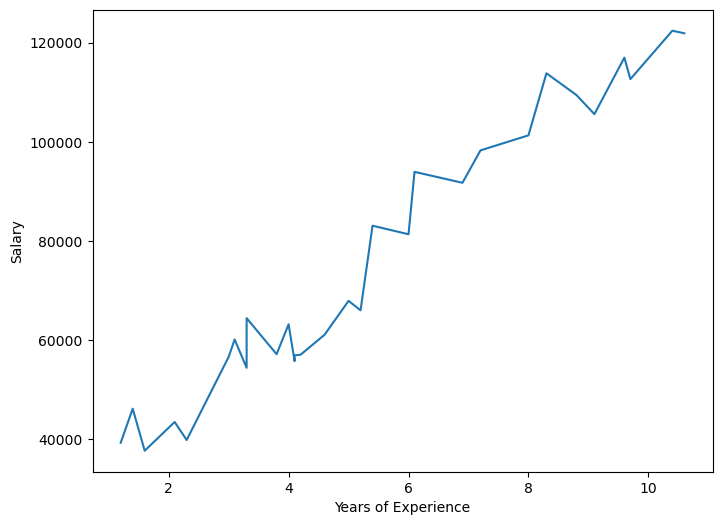

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(data['YearsExperience'], data['Salary'])
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [9]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [10]:
# Calculate residuals for training and testing sets

residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

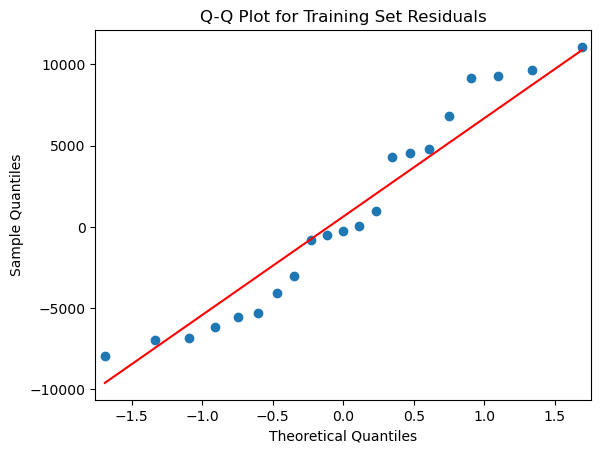

In [11]:
# Create Q-Q plots for residuals
sm.qqplot(residuals_train, line='s')
plt.title('Q-Q Plot for Training Set Residuals')
plt.show()

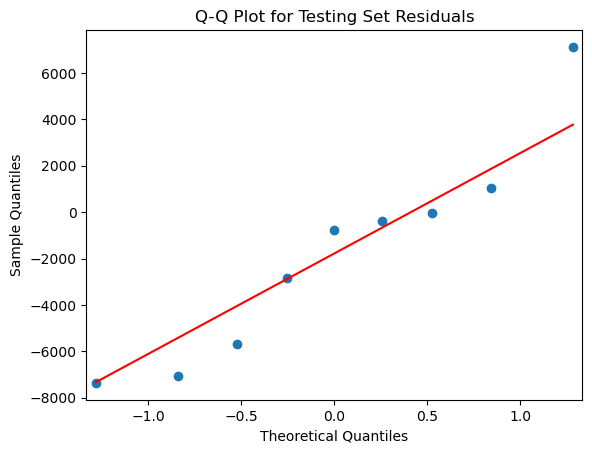

In [12]:
sm.qqplot(residuals_test, line='s')
plt.title('Q-Q Plot for Testing Set Residuals')
plt.show()

In [13]:
mse_train = np.mean((y_pred_train - y_train)**2)
rmse_train = np.sqrt(mse_train)
ssr_train = np.sum((y_pred_train - np.mean(y_train))**2)
sst_train = np.sum((y_train - np.mean(y_train))**2)
r2_train = ssr_train / sst_train

r2_train

1.0449749625521225

In [14]:
mse_test = np.mean((y_pred_test - y_test)**2)
rmse_test = np.sqrt(mse_test)
ssr_test = np.sum((y_pred_test - np.mean(y_test))**2)
sst_test = np.sum((y_test - np.mean(y_test))**2)
r2_test = ssr_test / sst_test

r2_test

0.993664246903825

In [15]:
lr_cv = LinearRegression()
scores = cross_val_score(lr_cv, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-scores)
cv_rmse_scores

array([7960.69748259, 6060.73058508, 7061.31991369, 8158.30483477,
       9131.24319864])

In [16]:
print("Training set:")
print("MSE: ", mse_train)
print("RMSE: ", rmse_train)
print("R^2: ", r2_train)
print("Testing set:")
print("MSE: ", mse_test)
print("RMSE: ", rmse_test)
print("R^2: ", r2_test)

Training set:
MSE:  37106800.60829578
RMSE:  6091.535160228149
R^2:  1.0449749625521225
Testing set:
MSE:  21909968.606096387
RMSE:  4680.8085419184135
R^2:  0.993664246903825


In [17]:
print("Cross-validation:")
print("RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))
print("Std RMSE:", np.std(cv_rmse_scores))

Cross-validation:
RMSE scores: [7960.69748259 6060.73058508 7061.31991369 8158.30483477 9131.24319864]
Mean RMSE: 7674.459202955477
Std RMSE: 1040.9916808917064


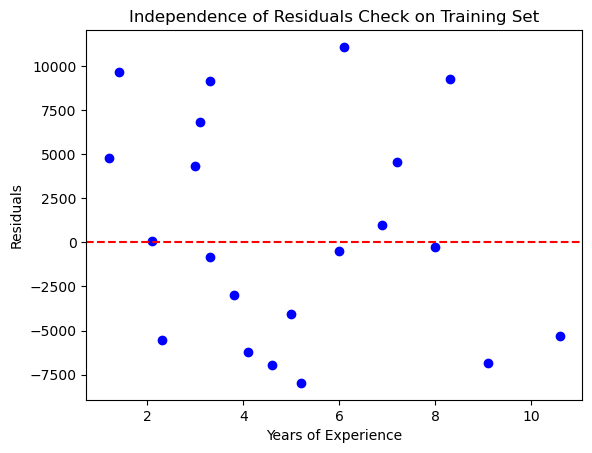

In [18]:
plt.scatter(X_train, residuals_train, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Independence of Residuals Check on Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Residuals')
plt.show()

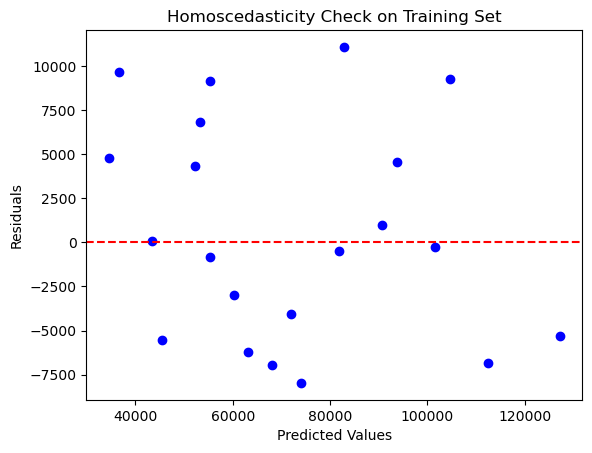

In [19]:
plt.scatter(y_pred_train, residuals_train, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homoscedasticity Check on Training Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 

# 